In [241]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import LabelBinarizer
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
from seaborn import histplot
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV, KFold, cross_val_predict
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

In [242]:
df = pd.read_csv('TARP.csv')
df.head()

,Soil Moisture,Temperature,Soil Humidity,Time,Air temperature (C),Wind speed (Km/h),Air humidity (%),Wind gust (Km/h),Pressure (KPa),ph,rainfall,N,P,K,Status
0,54,22,70,21,19.52,2.13,55.04,6.30,101.50,6.502985,202.935536,90.0,42.0,43.0,ON
1,12,20,40,104,19.49,2.01,55.17,10.46,101.50,7.038096,226.655537,85.0,58.0,41.0,OFF
2,34,26,35,62,19.47,1.90,55.30,14.63,101.51,7.840207,263.964248,60.0,55.0,44.0,ON
3,7,44,44,93,19.54,2.28,54.20,16.08,101.51,6.980401,242.864034,74.0,35.0,40.0,OFF
4,50,38,23,92,19.61,2.66,53.09,17.52,101.51,7.628473,262.717340,78.0,42.0,42.0,OFF


In [243]:
df.shape

(100000, 15)

In [244]:
encoder = LabelBinarizer()
df['Status'] = encoder.fit_transform(df['Status'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Soil Moisture        100000 non-null  int64  
 1   Temperature          100000 non-null  int64  
 2    Soil Humidity       100000 non-null  int64  
 3   Time                 100000 non-null  int64  
 4   Air temperature (C)  23995 non-null   float64
 5   Wind speed (Km/h)    23995 non-null   float64
 6   Air humidity (%)     23995 non-null   float64
 7   Wind gust (Km/h)     23995 non-null   float64
 8   Pressure (KPa)       23995 non-null   float64
 9   ph                   2200 non-null    float64
 10  rainfall             2200 non-null    float64
 11  N                    2200 non-null    float64
 12  P                    2200 non-null    float64
 13  K                    2200 non-null    float64
 14  Status               100000 non-null  int32  
dtypes: float64(10), in

In [245]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Soil Moisture,100000.0,45.484070,25.993998,1.000000,23.000000,45.000000,68.000000,90.000000
Temperature,100000.0,22.536100,13.251352,0.000000,11.000000,23.000000,34.000000,45.000000
Soil Humidity,100000.0,45.016790,14.726676,20.000000,32.000000,45.000000,58.000000,70.000000
Time,100000.0,55.253650,32.093033,0.000000,28.000000,55.000000,83.000000,110.000000
Air temperature (C),23995.0,24.263780,6.756751,11.220000,18.580000,22.150000,29.590000,45.560000
Wind speed (Km/h),23995.0,9.896898,4.325666,0.000000,6.830000,9.530000,12.460000,31.360000
Air humidity (%),23995.0,58.521052,30.073448,0.590000,33.980000,61.310000,86.360000,96.000000
Wind gust (Km/h),23995.0,41.744905,24.168987,0.000000,21.820000,37.240000,59.275000,133.330000
Pressure (KPa),23995.0,101.131418,0.218448,100.500000,100.980000,101.120000,101.260000,101.860000
ph,2200.0,6.469480,0.773938,3.504752,5.971693,6.425045,6.923643,9.935091


In [246]:
df.isna().sum()

Soil Moisture              0
Temperature                0
 Soil Humidity             0
Time                       0
Air temperature (C)    76005
Wind speed (Km/h)      76005
Air humidity (%)       76005
Wind gust (Km/h)       76005
Pressure (KPa)         76005
ph                     97800
rainfall               97800
N                      97800
P                      97800
K                      97800
Status                     0
dtype: int64

In [247]:
imputer = IterativeImputer(random_state=42, max_iter=2000, verbose=True)
data = imputer.fit_transform(df)
data = pd.DataFrame(data, columns = df.columns)
data.head()

[IterativeImputer] Completing matrix with shape (100000, 15)
[IterativeImputer] Change: 290.80942331563296, scaled tolerance: 0.2985601175 
[IterativeImputer] Change: 92.93743015114732, scaled tolerance: 0.2985601175 
[IterativeImputer] Change: 36.41378245598608, scaled tolerance: 0.2985601175 
[IterativeImputer] Change: 22.28877877559208, scaled tolerance: 0.2985601175 
[IterativeImputer] Change: 14.186852778425527, scaled tolerance: 0.2985601175 
[IterativeImputer] Change: 9.05747236029081, scaled tolerance: 0.2985601175 
[IterativeImputer] Change: 5.783789901159865, scaled tolerance: 0.2985601175 
[IterativeImputer] Change: 3.6933301763236477, scaled tolerance: 0.2985601175 
[IterativeImputer] Change: 2.3584320256112017, scaled tolerance: 0.2985601175 
[IterativeImputer] Change: 1.5060124036963742, scaled tolerance: 0.2985601175 
[IterativeImputer] Change: 0.9616869696618906, scaled tolerance: 0.2985601175 
[IterativeImputer] Change: 0.6140997413687108, scaled tolerance: 0.298560117

,Soil Moisture,Temperature,Soil Humidity,Time,Air temperature (C),Wind speed (Km/h),Air humidity (%),Wind gust (Km/h),Pressure (KPa),ph,rainfall,N,P,K,Status
0,54.0,22.0,70.0,21.0,19.52,2.13,55.04,6.30,101.50,6.502985,202.935536,90.0,42.0,43.0,1.0
1,12.0,20.0,40.0,104.0,19.49,2.01,55.17,10.46,101.50,7.038096,226.655537,85.0,58.0,41.0,0.0
2,34.0,26.0,35.0,62.0,19.47,1.90,55.30,14.63,101.51,7.840207,263.964248,60.0,55.0,44.0,1.0
3,7.0,44.0,44.0,93.0,19.54,2.28,54.20,16.08,101.51,6.980401,242.864034,74.0,35.0,40.0,0.0
4,50.0,38.0,23.0,92.0,19.61,2.66,53.09,17.52,101.51,7.628473,262.717340,78.0,42.0,42.0,0.0


In [248]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Soil Moisture        100000 non-null  float64
 1   Temperature          100000 non-null  float64
 2    Soil Humidity       100000 non-null  float64
 3   Time                 100000 non-null  float64
 4   Air temperature (C)  100000 non-null  float64
 5   Wind speed (Km/h)    100000 non-null  float64
 6   Air humidity (%)     100000 non-null  float64
 7   Wind gust (Km/h)     100000 non-null  float64
 8   Pressure (KPa)       100000 non-null  float64
 9   ph                   100000 non-null  float64
 10  rainfall             100000 non-null  float64
 11  N                    100000 non-null  float64
 12  P                    100000 non-null  float64
 13  K                    100000 non-null  float64
 14  Status               100000 non-null  float64
dtypes: float64(15)
mem

In [249]:
correlation_matrix = data.corr()

# Выводим корреляцию признаков только с целевой переменной (последний столбец)
target_correlation = correlation_matrix['Status'].sort_values(ascending=False)
print("Корреляция признаков с целевой переменной:")
print(target_correlation)

Корреляция признаков с целевой переменной:
Status                 1.000000
Temperature            0.301471
ph                     0.028921
 Soil Humidity         0.024037
Air temperature (C)    0.014128
Wind speed (Km/h)      0.013544
Wind gust (Km/h)       0.005852
Air humidity (%)      -0.008433
rainfall              -0.012756
Pressure (KPa)        -0.013069
N                     -0.034694
K                     -0.099742
P                     -0.123265
Time                  -0.256908
Soil Moisture         -0.322340
Name: Status, dtype: float64


<Axes: >

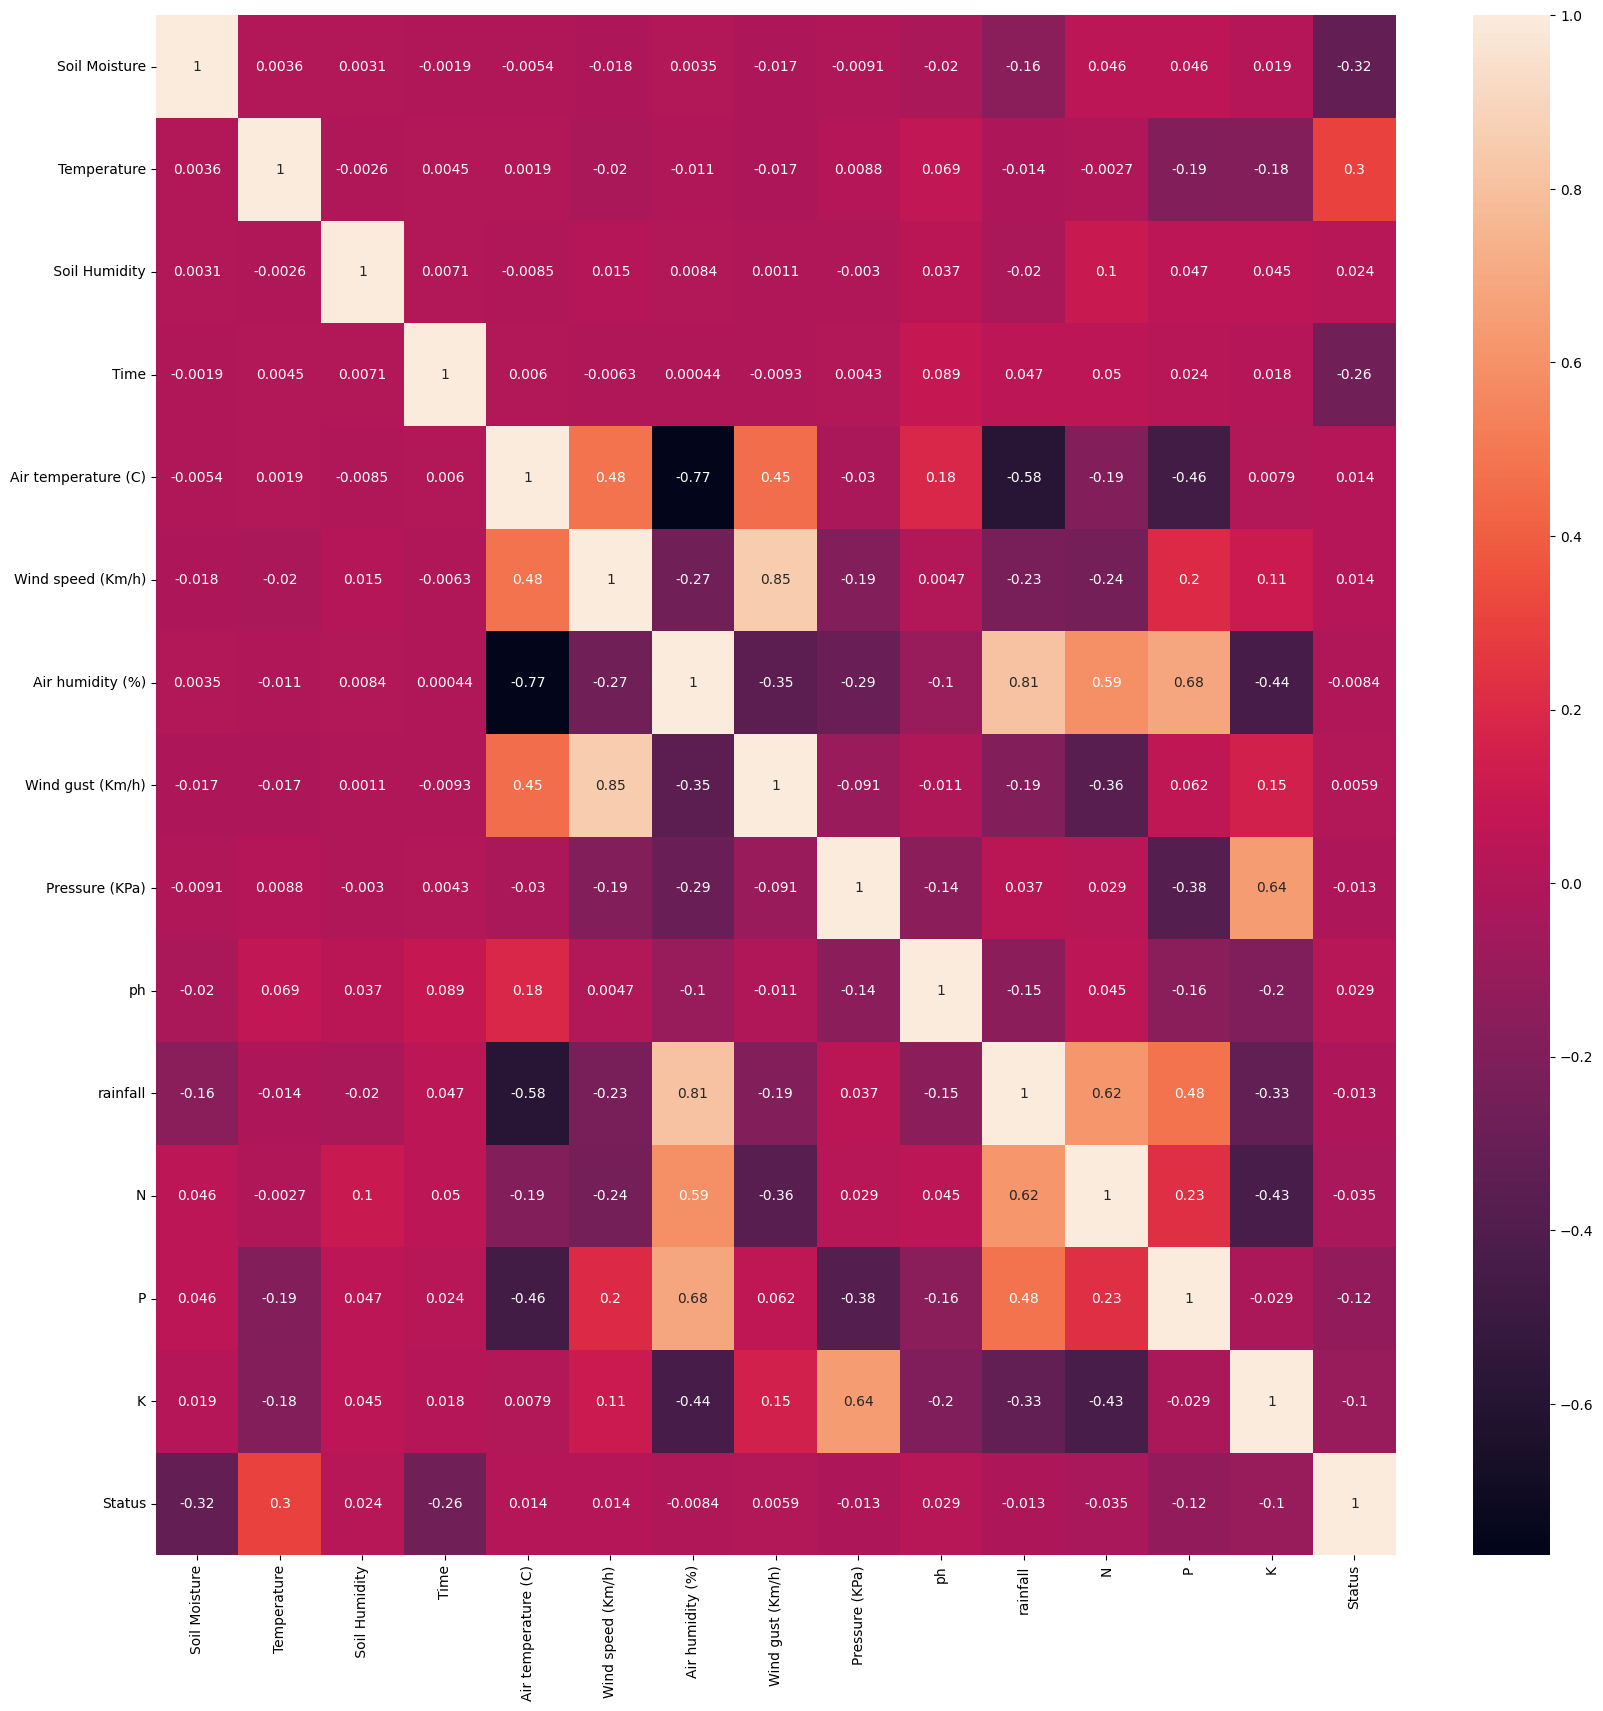

In [250]:
plt.figure(figsize=(20,20))
corr = data.corr()
sns.heatmap(corr,annot=True)

In [251]:
scaler = MinMaxScaler((-1,1))
sdf = scaler.fit_transform(data.iloc[:,:-1])#Масштаб. для кластермеп (вся ген.выборка кроме таргета)
scaled_df = pd.DataFrame(sdf, columns = data.iloc[:,:-1].columns)
scaled_df['Status'] = data['Status']
scaled_df.head()

,Soil Moisture,Temperature,Soil Humidity,Time,Air temperature (C),Wind speed (Km/h),Air humidity (%),Wind gust (Km/h),Pressure (KPa),ph,rainfall,N,P,K,Status
0,0.191011,-0.022222,1.00,-0.618182,-0.516599,-0.864158,0.141390,-0.905498,0.470588,-0.067473,0.312916,0.285714,-0.471429,-0.242651,1.0
1,-0.752809,-0.111111,-0.20,0.890909,-0.518346,-0.871811,0.144115,-0.843096,0.470588,0.098961,0.483349,0.214286,-0.242857,-0.257992,0.0
2,-0.258427,0.155556,-0.40,0.127273,-0.519511,-0.878827,0.146840,-0.780545,0.485294,0.348438,0.751421,-0.142857,-0.285714,-0.234980,1.0
3,-0.865169,0.955556,-0.04,0.690909,-0.515434,-0.854592,0.123782,-0.758794,0.485294,0.081016,0.599811,0.057143,-0.571429,-0.265663,0.0
4,0.101124,0.688889,-0.88,0.672727,-0.511357,-0.830357,0.100514,-0.737193,0.485294,0.282583,0.742461,0.114286,-0.471429,-0.250322,0.0


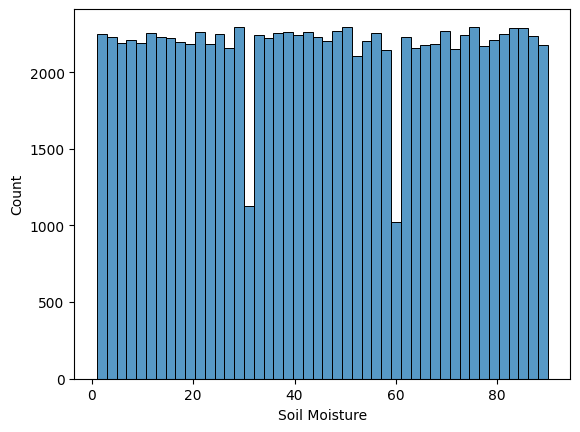

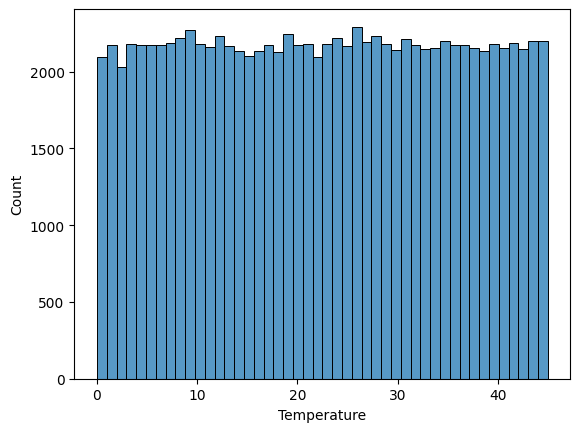

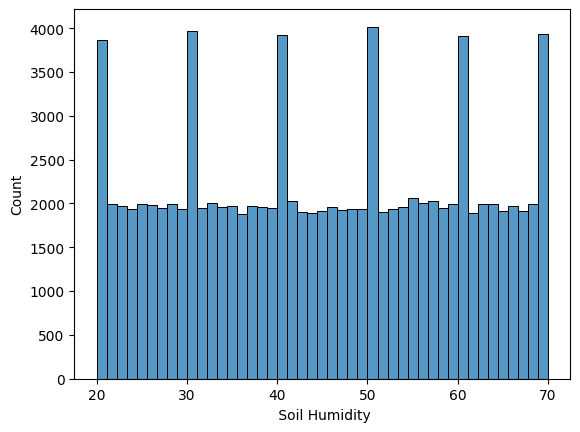

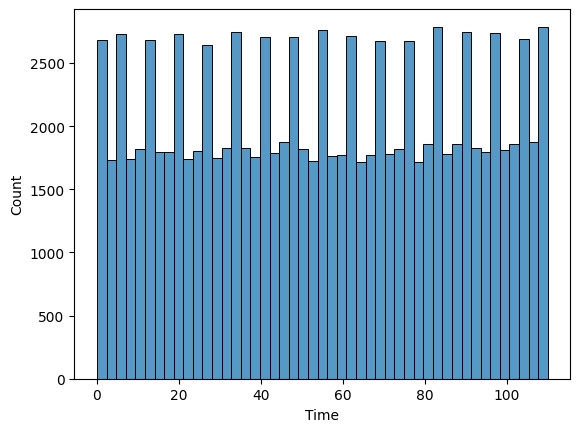

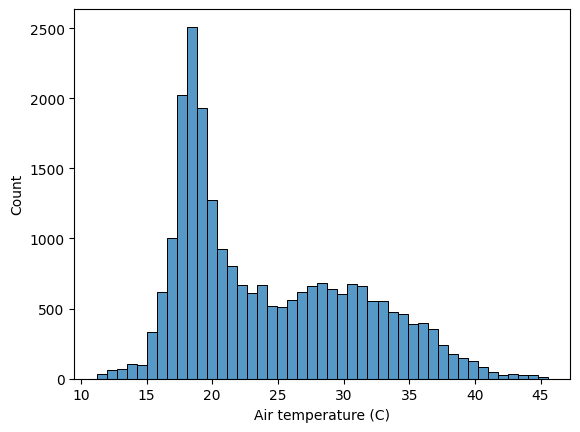

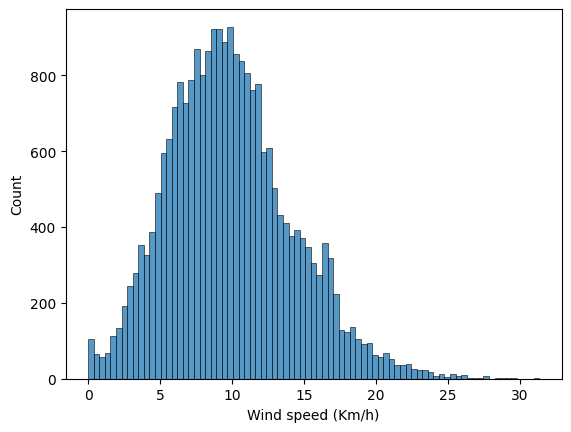

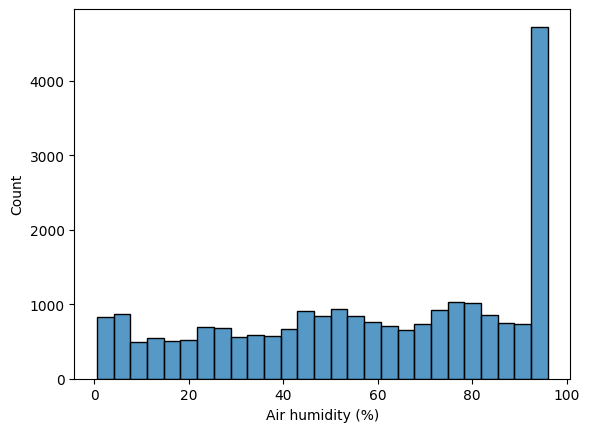

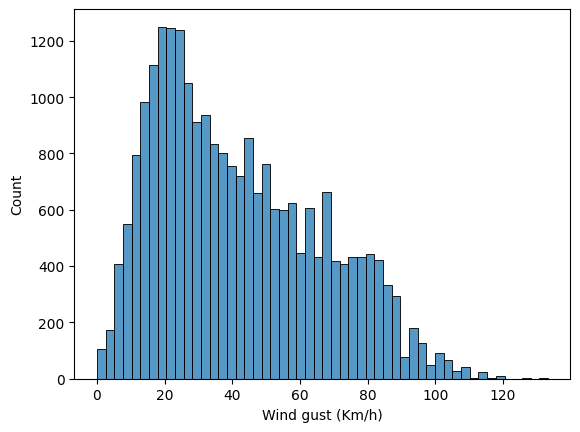

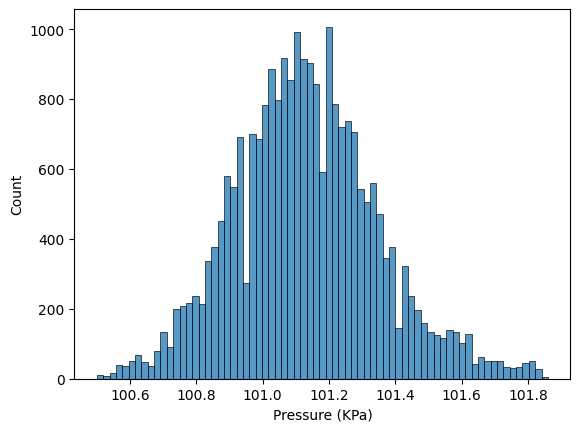

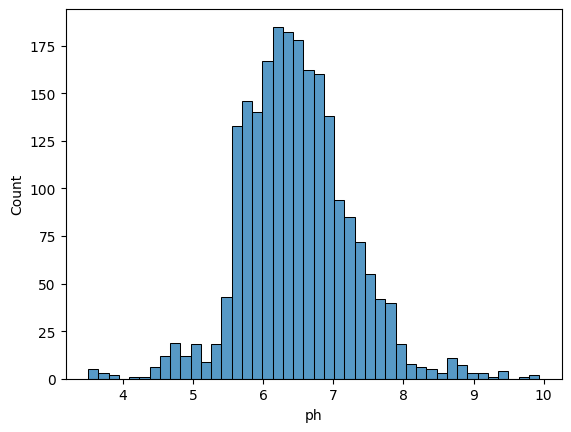

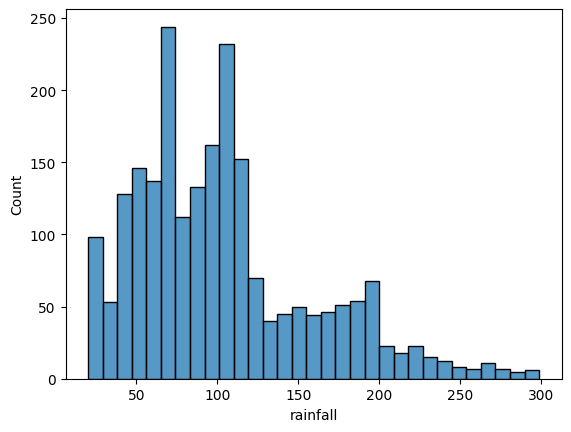

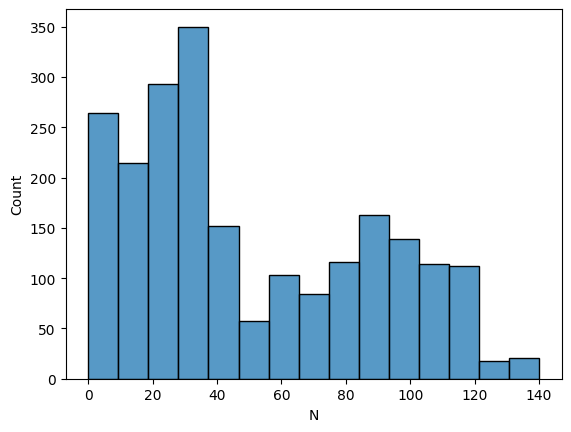

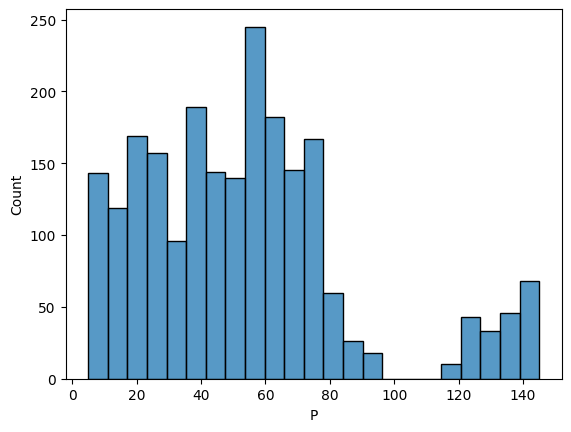

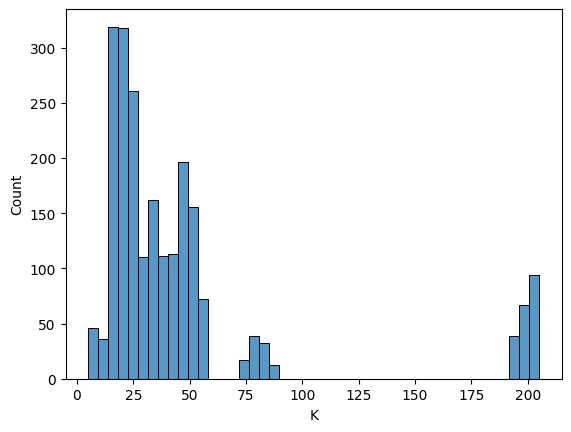

In [252]:
def histplot(col):
  sns.histplot(df[col])
  plt.show()

for i in list(df.columns)[:-1]:
  histplot(i)

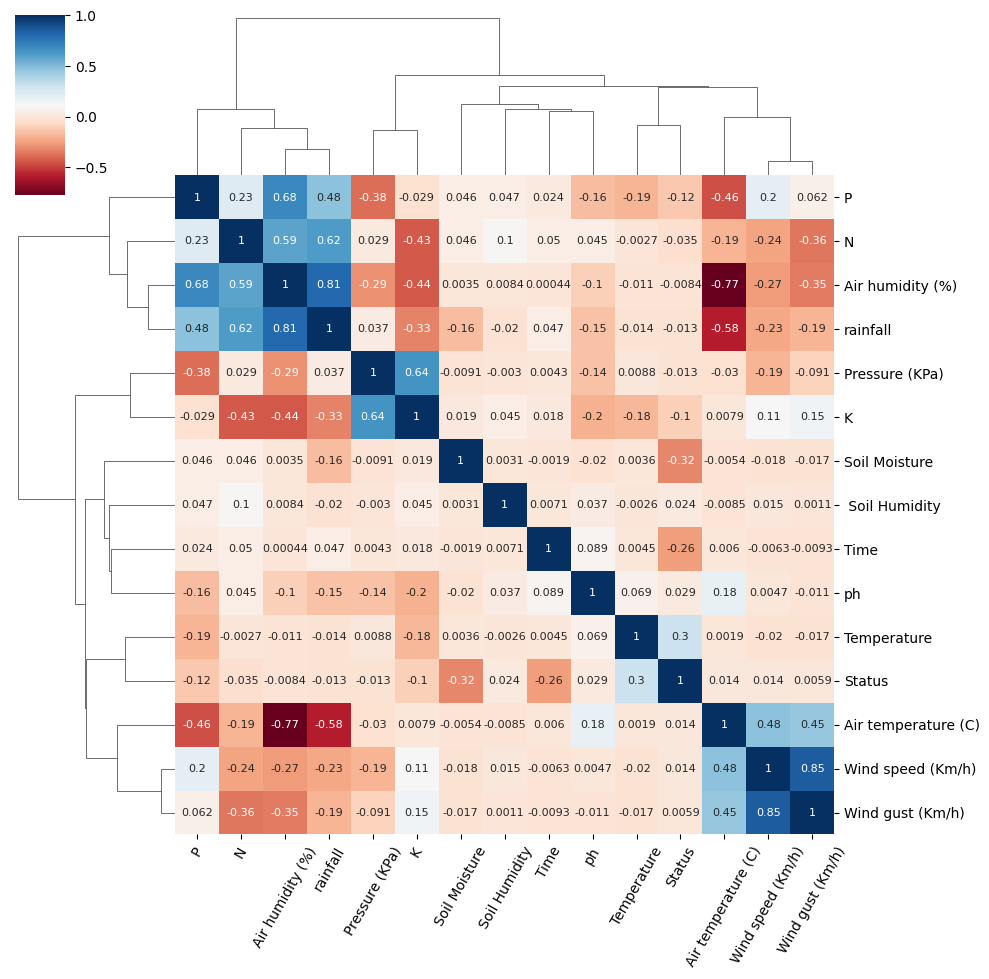

In [253]:
clsmp = sns.clustermap(scaled_df.corr(), 
                   method = 'complete', 
                   cmap   = 'RdBu', 
                   annot  = True, 
                   annot_kws = {'size': 8})
plt.setp(clsmp.ax_heatmap.get_xticklabels(), rotation=60);

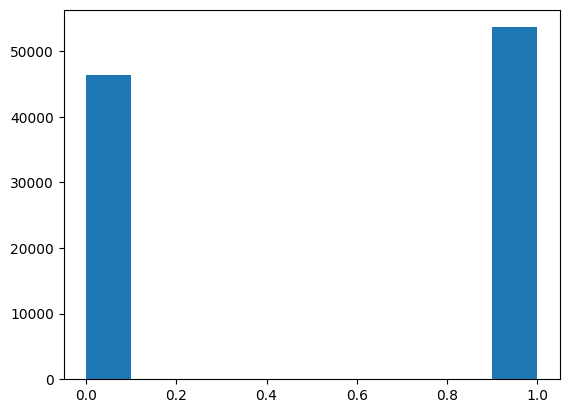

In [254]:
plt.hist(scaled_df['Status'])
plt.show()

In [255]:
X = data.drop('Status', axis=1)
y = data['Status']

In [256]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=42)

In [257]:
col_list = X_train.columns

In [258]:
scaler = MinMaxScaler((-1,1))
X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

In [259]:
X_train = pd.DataFrame(X_train_scl, columns=col_list)
X_test = pd.DataFrame(X_test_scl, columns=col_list)

In [260]:
base_model = LogisticRegression()

In [261]:
base_model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [262]:
y_pred = base_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели: {accuracy:.4f}')

print(classification_report(y_test, y_pred))

Точность модели: 0.7693
              precision    recall  f1-score   support

         0.0       0.77      0.73      0.75     13985
         1.0       0.77      0.81      0.79     16015

    accuracy                           0.77     30000
   macro avg       0.77      0.77      0.77     30000
weighted avg       0.77      0.77      0.77     30000



In [263]:
model_lrcv = LogisticRegressionCV(random_state=42)

In [264]:
model_lrcv.fit(X_train, y_train)


,Cs,10
,fit_intercept,True
,cv,None
,dual,False
,penalty,'l2'
,scoring,None
,solver,'lbfgs'
,tol,0.0001
,max_iter,100
,class_weight,None
,n_jobs,None


In [265]:
model_lrcv.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [266]:
model_lrcv.C_

array([21.5443469])

In [267]:
y_pred = model_lrcv.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели Лог.регрессии CV: {accuracy:.4f}')

print(classification_report(y_test, y_pred))

Точность модели Лог.регрессии CV: 0.8252
              precision    recall  f1-score   support

         0.0       0.83      0.79      0.81     13985
         1.0       0.82      0.86      0.84     16015

    accuracy                           0.83     30000
   macro avg       0.83      0.82      0.82     30000
weighted avg       0.83      0.83      0.82     30000



In [268]:
model_rf = RandomForestClassifier(n_estimators=5, max_depth=5, random_state=42)

model_rf.fit(X_train, y_train)

,n_estimators,5
,criterion,'gini'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [269]:
# Получение предсказаний на тестовых данных
y_pred_rf_test = model_rf.predict(X_test)
y_pred_rf_train = model_rf.predict(X_train)


In [270]:
accuracy_test = accuracy_score(y_test, y_pred_rf_test)
accuracy_train = accuracy_score(y_train, y_pred_rf_train)
print(f'Точность модели RandomForest: {accuracy_test:.4f}')
print(f'Точность модели RandomForest: {accuracy_train:.4f}')

print(classification_report(y_test, y_pred_rf_test))
print(classification_report(y_train, y_pred_rf_train))

Точность модели RandomForest: 0.9304
Точность модели RandomForest: 0.9332
              precision    recall  f1-score   support

         0.0       0.95      0.90      0.92     13985
         1.0       0.92      0.96      0.94     16015

    accuracy                           0.93     30000
   macro avg       0.93      0.93      0.93     30000
weighted avg       0.93      0.93      0.93     30000

              precision    recall  f1-score   support

         0.0       0.95      0.90      0.93     32365
         1.0       0.92      0.96      0.94     37635

    accuracy                           0.93     70000
   macro avg       0.94      0.93      0.93     70000
weighted avg       0.93      0.93      0.93     70000



In [271]:
missing_percentages = df.isnull().sum() / len(df)
columns_to_drop = missing_percentages[missing_percentages > 0.8].index
df.drop(columns=columns_to_drop, inplace=True)

In [272]:
X = df.drop('Status', axis=1)
y = df['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [273]:
model_lgbm = lgb.LGBMClassifier(n_estimators=15, max_depth=7, random_state=42)

model_lgbm.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 37635, number of negative: 32365
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0,002310 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1456
[LightGBM] [Info] Number of data points in the train set: 70000, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0,537643 -> initscore=0,150857
[LightGBM] [Info] Start training from score 0,150857


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,7
,learning_rate,0.1
,n_estimators,15
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [274]:
y_pred_lgbm_test = model_lgbm.predict(X_test)
y_pred_lgbm_train = model_lgbm.predict(X_train)

# Оценка производительности
accuracy_lgbm_test = accuracy_score(y_test, y_pred_lgbm_test)
accuracy_lgbm_train = accuracy_score(y_train, y_pred_lgbm_train)
print(f"Точность модели LightGBM: {accuracy_lgbm_test:.4f}\n")
print(f"Точность модели LightGBM: {accuracy_lgbm_train:.4f}\n")
# Полный отчет по классификации
print("Отчёт по классификации:")
print(classification_report(y_test, y_pred_lgbm_test))
print(classification_report(y_train, y_pred_lgbm_train))

Точность модели LightGBM: 0.9654

Точность модели LightGBM: 0.9677

Отчёт по классификации:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96     13985
           1       0.95      0.98      0.97     16015

    accuracy                           0.97     30000
   macro avg       0.97      0.96      0.97     30000
weighted avg       0.97      0.97      0.97     30000

              precision    recall  f1-score   support

           0       0.98      0.95      0.96     32365
           1       0.96      0.98      0.97     37635

    accuracy                           0.97     70000
   macro avg       0.97      0.97      0.97     70000
weighted avg       0.97      0.97      0.97     70000



In [275]:
missing_percentages = df.isnull().sum() / len(df)
columns_to_drop = missing_percentages[missing_percentages > 0.7].index
df.drop(columns=columns_to_drop, inplace=True)

In [276]:
X = df.drop('Status', axis=1)
y = df['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [277]:
model_lgbm = lgb.LGBMClassifier(n_estimators=10, max_depth=5, random_state=42)

model_lgbm.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 37635, number of negative: 32365
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0,005129 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 300
[LightGBM] [Info] Number of data points in the train set: 70000, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0,537643 -> initscore=0,150857
[LightGBM] [Info] Start training from score 0,150857
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

,boosting_type,'gbdt'
,num_leaves,31
,max_depth,5
,learning_rate,0.1
,n_estimators,10
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [278]:
X_train

,Soil Moisture,Temperature,Soil Humidity,Time
76513,39,39,56,94
60406,67,18,28,109
27322,75,4,57,3
53699,51,2,64,44
65412,18,28,20,1
...,...,...,...,...
6265,28,8,64,103
54886,73,8,36,30
76820,75,18,62,42
860,22,28,25,35


In [279]:
y_pred_lgbm_test = model_lgbm.predict(X_test)
y_pred_lgbm_train = model_lgbm.predict(X_train)

# Оценка производительности
accuracy_lgbm_test = accuracy_score(y_test, y_pred_lgbm_test)
accuracy_lgbm_train = accuracy_score(y_train, y_pred_lgbm_train)
print(f"Точность модели LightGBM test: {accuracy_lgbm_test:.4f}\n")
print(f"Точность модели LightGBM train: {accuracy_lgbm_train:.4f}\n")
# Полный отчет по классификации
print("Отчёт по классификации:")
print(classification_report(y_test, y_pred_lgbm_test))
print(classification_report(y_train, y_pred_lgbm_train))

Точность модели LightGBM test: 0.9113

Точность модели LightGBM train: 0.9101

Отчёт по классификации:
              precision    recall  f1-score   support

           0       0.94      0.86      0.90     13985
           1       0.89      0.95      0.92     16015

    accuracy                           0.91     30000
   macro avg       0.92      0.91      0.91     30000
weighted avg       0.91      0.91      0.91     30000

              precision    recall  f1-score   support

           0       0.94      0.86      0.90     32365
           1       0.89      0.95      0.92     37635

    accuracy                           0.91     70000
   macro avg       0.91      0.91      0.91     70000
weighted avg       0.91      0.91      0.91     70000



In [280]:
y_pred_proba_test = model_lgbm.predict_proba(X_test)[:, 1]
y_pred_proba_train = model_lgbm.predict_proba(X_train)[:, 1]

In [281]:
# Рассчитываем ROC-AUC для тестовой и тренировочной выборок
roc_auc_test = roc_auc_score(y_test, y_pred_proba_test)
roc_auc_train = roc_auc_score(y_train, y_pred_proba_train)

print(f"ROC-AUC на тесте: {roc_auc_test:.4f}")
print(f"ROC-AUC на трейне: {roc_auc_train:.4f}")

# Получаем координаты для ROC-кривой
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_proba_test)
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_proba_train)

ROC-AUC на тесте: 0.9756
ROC-AUC на трейне: 0.9763


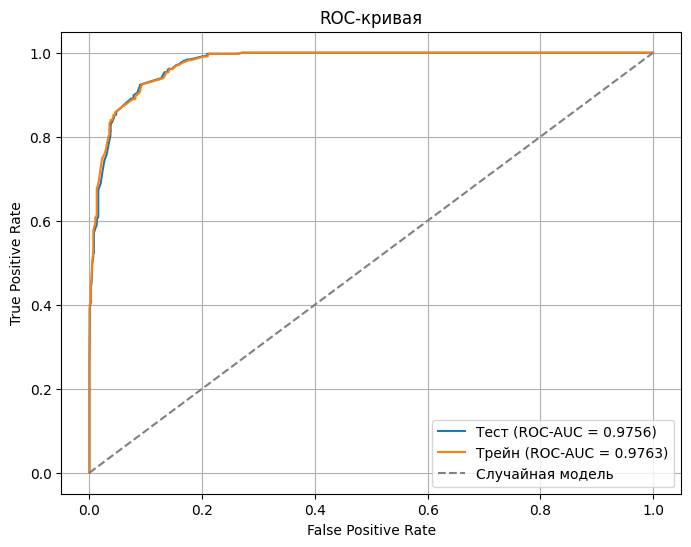

In [282]:
# Построение графика
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, label=f'Тест (ROC-AUC = {roc_auc_test:.4f})')
plt.plot(fpr_train, tpr_train, label=f'Трейн (ROC-AUC = {roc_auc_train:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Случайная модель')

plt.title('ROC-кривая')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

In [283]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
}

# Инициализация модели LightGBM
model_lgbm = lgb.LGBMClassifier(random_state=42)

# Инициализация HalvingGridSearchCV
# HalvingGridSearchCV быстрее, чем GridSearchCV,
# так как постепенно отсеивает худшие комбинации
halving_grid_search = HalvingGridSearchCV(
    estimator=model_lgbm,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=2,
    n_jobs=-1,
    factor=2  # На каждом шаге оставляем половину лучших кандидатов
)

# Обучение модели
halving_grid_search.fit(X_train, y_train)

# Получение лучших параметров и модели
print("Лучшие параметры:", halving_grid_search.best_params_)
print("Лучший score:", halving_grid_search.best_score_)
best_model = halving_grid_search.best_estimator_

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 4375
max_resources_: 70000
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 27
n_resources: 4375
Fitting 5 folds for each of 27 candidates, totalling 135 fits
----------
iter: 1
n_candidates: 14
n_resources: 8750
Fitting 5 folds for each of 14 candidates, totalling 70 fits
----------
iter: 2
n_candidates: 7
n_resources: 17500
Fitting 5 folds for each of 7 candidates, totalling 35 fits
----------
iter: 3
n_candidates: 4
n_resources: 35000
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 4
n_candidates: 2
n_resources: 70000
Fitting 5 folds for each of 2 candidates, totalling 10 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 37635, number of negative: 32365
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0,002449 seconds.
You can set `force_col_

In [284]:
y_pred_lgbm_best_test = best_model.predict(X_test)
y_pred_lgbm_best_train = best_model.predict(X_train)

# Оценка производительности
accuracy_lgbm_best_test = accuracy_score(y_test, y_pred_lgbm_best_test)
accuracy_lgbm_best_train = accuracy_score(y_train, y_pred_lgbm_best_train)
print(f"Точность модели LightGBM: {accuracy_lgbm_best_test:.4f}\n")
print(f"Точность модели LightGBM: {accuracy_lgbm_best_train:.4f}\n")
# Полный отчет по классификации
print("Отчёт по классификации:")
print(classification_report(y_test, y_pred_lgbm_best_test))
print(classification_report(y_train, y_pred_lgbm_best_train))

Точность модели LightGBM: 1.0000

Точность модели LightGBM: 1.0000

Отчёт по классификации:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13985
           1       1.00      1.00      1.00     16015

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     32365
           1       1.00      1.00      1.00     37635

    accuracy                           1.00     70000
   macro avg       1.00      1.00      1.00     70000
weighted avg       1.00      1.00      1.00     70000

